In [480]:
# Importar para manipulacion de datos 
import pandas as pd
# Importar libreria para dividir entrenamiento y prueba
from sklearn.model_selection import train_test_split

kaggle datasets download -d shelvigarg/credit-card-buyers

In [481]:
# Especificar la ruta del archivo
#data = pd.read_csv("/content/Bank_registries.csv")
data = pd.read_csv('train data credit card.csv')
#data = pd.read_csv('/kaggle/input/credit-card-buyers/train data credit card.csv')
data = data.head(1000)
#print(data)
print("Filas y columnas")
print("Ejemplos y propiedades")
print(data.shape)
data.head(15)

Filas y columnas
Ejemplos y propiedades
(1000, 11)


,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
5,ACUTYTWS,Male,56,RG261,Self_Employed,X1,32,No,544163,Yes,0
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,NaN,1056750,Yes,1
7,JJNJUQMQ,Female,48,RG265,Self_Employed,X3,13,No,444724,Yes,0
8,ZMQFYKCB,Female,40,RG283,Self_Employed,X2,38,No,1274284,No,0
9,NVKTFBA2,Female,55,RG268,Self_Employed,X2,49,Yes,2014239,No,0


###  ID, sexo, edad, código_región, ocupación, código_canal, antigüedad, producto de crédito, saldo_cuenta_promedio, está_activo, es_líder

In [482]:
#Estadísticas descriptivas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   1000 non-null   object
 1   Gender               1000 non-null   object
 2   Age                  1000 non-null   int64 
 3   Region_Code          1000 non-null   object
 4   Occupation           1000 non-null   object
 5   Channel_Code         1000 non-null   object
 6   Vintage              1000 non-null   int64 
 7   Credit_Product       891 non-null    object
 8   Avg_Account_Balance  1000 non-null   int64 
 9   Is_Active            1000 non-null   object
 10  Is_Lead              1000 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 86.1+ KB


#### hay filas que tienen espacios en blanco

In [483]:
#cuántos valores únicos hay en cada campo.
print(data.nunique())
print("------------")
print(data['Gender'].unique())
print(data['Region_Code'].unique())
print(data['Occupation'].unique())
print(data['Channel_Code'].unique())
print(data['Credit_Product'].unique())
print(data['Is_Active'].unique())


ID                     1000
Gender                    2
Age                      62
Region_Code              35
Occupation                4
Channel_Code              4
Vintage                  62
Credit_Product            2
Avg_Account_Balance     993
Is_Active                 2
Is_Lead                   2
dtype: int64
------------
['Female' 'Male']
['RG268' 'RG277' 'RG270' 'RG282' 'RG261' 'RG265' 'RG283' 'RG254' 'RG269'
 'RG257' 'RG279' 'RG280' 'RG252' 'RG284' 'RG259' 'RG281' 'RG258' 'RG266'
 'RG260' 'RG274' 'RG256' 'RG275' 'RG273' 'RG267' 'RG272' 'RG251' 'RG262'
 'RG264' 'RG278' 'RG276' 'RG263' 'RG250' 'RG255' 'RG253' 'RG271']
['Other' 'Salaried' 'Self_Employed' 'Entrepreneur']
['X3' 'X1' 'X2' 'X4']
['No' nan 'Yes']
['No' 'Yes']


¿Tienen algún significado los valores en blanco en 'Crédito_Producto'?

Podemos comprobar rápidamente que podemos ver que los valores en blanco tienden a tener un resultado determinado, lo que significaría que el valor en blanco también es importante.

## Limpieza de datos

Ignoramos las columnas RowNumber, CustomerID y Surname porque no aportan valor

One Hot Enconding consiste en binarizar variables categoricas

Dummy Encondig consiste en desdoblar una variable categorica en tantas columnas como niveles tenga, menos una.

In [484]:
# Eliminar las columnas innecesarias del DataFrame
#columns_to_drop = ['ID', 'CustomerId', 'Surname']
columns_to_drop = ['ID','Region_Code']
data = data.drop(columns=columns_to_drop)


In [485]:
# Convertir columnas categóricas en one-hot encoding
#data = pd.get_dummies(data, columns=['Geography'], prefix=['Country'])
data = pd.get_dummies(data,  columns=['Gender', 'Is_Active','Occupation','Channel_Code'])
data = pd.get_dummies(data,  columns=[ 'Credit_Product'], dummy_na=True)
# Convertir la columna "Gender" en variables one-hot


In [486]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1000 non-null   int64
 1   Vintage                   1000 non-null   int64
 2   Avg_Account_Balance       1000 non-null   int64
 3   Is_Lead                   1000 non-null   int64
 4   Gender_Female             1000 non-null   bool 
 5   Gender_Male               1000 non-null   bool 
 6   Is_Active_No              1000 non-null   bool 
 7   Is_Active_Yes             1000 non-null   bool 
 8   Occupation_Entrepreneur   1000 non-null   bool 
 9   Occupation_Other          1000 non-null   bool 
 10  Occupation_Salaried       1000 non-null   bool 
 11  Occupation_Self_Employed  1000 non-null   bool 
 12  Channel_Code_X1           1000 non-null   bool 
 13  Channel_Code_X2           1000 non-null   bool 
 14  Channel_Code_X3           1000 non-null  

In [487]:
columns_to_drop2 = ['Gender_Female','Is_Active_No','Credit_Product_No']
data = data.drop(columns=columns_to_drop2)

In [488]:
data.info()#Ya nos hemos ocupado de los datos nominales y binarios

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1000 non-null   int64
 1   Vintage                   1000 non-null   int64
 2   Avg_Account_Balance       1000 non-null   int64
 3   Is_Lead                   1000 non-null   int64
 4   Gender_Male               1000 non-null   bool 
 5   Is_Active_Yes             1000 non-null   bool 
 6   Occupation_Entrepreneur   1000 non-null   bool 
 7   Occupation_Other          1000 non-null   bool 
 8   Occupation_Salaried       1000 non-null   bool 
 9   Occupation_Self_Employed  1000 non-null   bool 
 10  Channel_Code_X1           1000 non-null   bool 
 11  Channel_Code_X2           1000 non-null   bool 
 12  Channel_Code_X3           1000 non-null   bool 
 13  Channel_Code_X4           1000 non-null   bool 
 14  Credit_Product_Yes        1000 non-null  

In [489]:
# Cargar datos
#data = data.head(1000)
#Mover la columna Exited a la ultima
Is_Lead   = data['Is_Lead']
# Eliminar la columna "Is_Lead" del DataFrame original
data = data.drop(columns=['Is_Lead'])

# Agregar la columna "Is_Lead" al final del DataFrame
data['Is_Lead'] = Is_Lead  
# Convertir las columnas bool a int64
#data['Gender_Male'] = data['Gender_Male'].astype('int64')

# Verificar el tipo de datos después de la conversión


In [490]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1000 non-null   int64
 1   Vintage                   1000 non-null   int64
 2   Avg_Account_Balance       1000 non-null   int64
 3   Gender_Male               1000 non-null   bool 
 4   Is_Active_Yes             1000 non-null   bool 
 5   Occupation_Entrepreneur   1000 non-null   bool 
 6   Occupation_Other          1000 non-null   bool 
 7   Occupation_Salaried       1000 non-null   bool 
 8   Occupation_Self_Employed  1000 non-null   bool 
 9   Channel_Code_X1           1000 non-null   bool 
 10  Channel_Code_X2           1000 non-null   bool 
 11  Channel_Code_X3           1000 non-null   bool 
 12  Channel_Code_X4           1000 non-null   bool 
 13  Credit_Product_Yes        1000 non-null   bool 
 14  Credit_Product_nan        1000 non-null  

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,43.601000,45.848000,1.108488e+06,0.241000
std,14.788255,31.940838,8.168453e+05,0.427904
min,24.000000,8.000000,1.608310e+05,0.000000
25%,30.000000,20.000000,6.093292e+05,0.000000
50%,42.000000,32.000000,8.984015e+05,0.000000
75%,53.000000,73.000000,1.363166e+06,0.000000
max,85.000000,133.000000,7.880380e+06,1.000000


## Normalización

In [491]:
valor_min_edad=24
valor_max_edad=85
valor_min_cuenta=1608310
valor_max_cuenta=7880380
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)
scaled_series = scaler.transform(data)
#df_scaled = scaler.fit_transform(data[['Age', 'Vintage','Avg_Account_Balance']])
data = pd.DataFrame(scaled_series, columns=data.columns)
data.info()

#data = data.astype(float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1000 non-null   float64
 1   Vintage                   1000 non-null   float64
 2   Avg_Account_Balance       1000 non-null   float64
 3   Gender_Male               1000 non-null   float64
 4   Is_Active_Yes             1000 non-null   float64
 5   Occupation_Entrepreneur   1000 non-null   float64
 6   Occupation_Other          1000 non-null   float64
 7   Occupation_Salaried       1000 non-null   float64
 8   Occupation_Self_Employed  1000 non-null   float64
 9   Channel_Code_X1           1000 non-null   float64
 10  Channel_Code_X2           1000 non-null   float64
 11  Channel_Code_X3           1000 non-null   float64
 12  Channel_Code_X4           1000 non-null   float64
 13  Credit_Product_Yes        1000 non-null   float64
 14  Credit_Pr

#### Considerando un porcentaje del 80% del total de los datos para entrenamiento y el 20% del total como datos de prueba

In [492]:
# Division de dataset en entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [493]:
#print(train_data)
#print(test_data)

In [494]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 29 to 102
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       800 non-null    float64
 1   Vintage                   800 non-null    float64
 2   Avg_Account_Balance       800 non-null    float64
 3   Gender_Male               800 non-null    float64
 4   Is_Active_Yes             800 non-null    float64
 5   Occupation_Entrepreneur   800 non-null    float64
 6   Occupation_Other          800 non-null    float64
 7   Occupation_Salaried       800 non-null    float64
 8   Occupation_Self_Employed  800 non-null    float64
 9   Channel_Code_X1           800 non-null    float64
 10  Channel_Code_X2           800 non-null    float64
 11  Channel_Code_X3           800 non-null    float64
 12  Channel_Code_X4           800 non-null    float64
 13  Credit_Product_Yes        800 non-null    float64
 14  Credit_Product

In [495]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 521 to 78
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       200 non-null    float64
 1   Vintage                   200 non-null    float64
 2   Avg_Account_Balance       200 non-null    float64
 3   Gender_Male               200 non-null    float64
 4   Is_Active_Yes             200 non-null    float64
 5   Occupation_Entrepreneur   200 non-null    float64
 6   Occupation_Other          200 non-null    float64
 7   Occupation_Salaried       200 non-null    float64
 8   Occupation_Self_Employed  200 non-null    float64
 9   Channel_Code_X1           200 non-null    float64
 10  Channel_Code_X2           200 non-null    float64
 11  Channel_Code_X3           200 non-null    float64
 12  Channel_Code_X4           200 non-null    float64
 13  Credit_Product_Yes        200 non-null    float64
 14  Credit_Product

In [496]:
train_data.to_csv("train.csv", index=False)

In [497]:
test_data.to_csv("test.csv", index=False)

In [498]:
#Carga de dataset
data = pd.read_csv('train.csv')

In [499]:
X = data.iloc[:, :15]
y = data.iloc[:, 15]
m = y.size

In [500]:
print(X)
print('*'*25)
print(y)

          Age  Vintage  Avg_Account_Balance  Gender_Male  Is_Active_Yes   
0    0.459016    0.384             0.116079          0.0            1.0  \
1    0.360656    0.904             0.069241          1.0            1.0   
2    0.311475    0.096             0.131761          0.0            1.0   
3    0.229508    0.096             0.075365          1.0            0.0   
4    0.737705    0.328             0.122488          1.0            1.0   
..        ...      ...                  ...          ...            ...   
795  0.032787    0.152             0.067629          1.0            0.0   
796  0.934426    0.384             0.017793          0.0            1.0   
797  0.016393    0.096             0.103999          1.0            0.0   
798  0.409836    0.432             0.072017          1.0            1.0   
799  0.327869    0.040             0.041505          1.0            1.0   

     Occupation_Entrepreneur  Occupation_Other  Occupation_Salaried   
0                        0.0

In [501]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline


<a id="section1"></a>
### 1.2 Implementacion

#### 1.2.1 Fución Sigmoidea

La hipotesis para la regresión logistica se define como:

$$ h_\theta(x) = g(\theta^T x)$$

donde la función $g$ is la función sigmoidea. La función sigmoidea se define como:

$$ g(z) = \frac{1}{1+e^{-z}}$$

Los resultados que debe generar la funcion sigmoidea para valores positivos amplios de `x`, deben ser cercanos a 1, mientras que para valores negativos grandes, la sigmoide debe generar valores cercanos 0. La evaluacion de `sigmoid(0)` debe dar un resultado exacto de 0.5. Esta funcion tambien debe poder trabajar con vectores y matrices.

In [502]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [503]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [504]:
print([X])
X = X.astype(np.float64)

[array([[1.        , 0.45901639, 0.384     , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.36065574, 0.904     , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.31147541, 0.096     , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.01639344, 0.096     , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.40983607, 0.432     , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.32786885, 0.04      , ..., 0.        , 0.        ,
        0.        ]])]


In [505]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    
    return J



In [506]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

In [507]:
#Carga de dataset
data = pd.read_csv('test.csv')
print(data)

          Age  Vintage  Avg_Account_Balance  Gender_Male  Is_Active_Yes   
0    0.311475    0.872             0.052492          0.0            1.0  \
1    0.081967    0.192             0.175984          1.0            0.0   
2    0.098361    0.136             0.064962          0.0            0.0   
3    0.360656    0.192             0.186708          1.0            1.0   
4    1.000000    0.856             0.094653          1.0            0.0   
..        ...      ...                  ...          ...            ...   
195  0.065574    0.096             0.051842          0.0            0.0   
196  0.098361    0.056             0.038797          0.0            0.0   
197  0.442623    0.632             0.119464          1.0            0.0   
198  0.557377    0.576             0.020542          0.0            1.0   
199  0.508197    0.584             0.247828          1.0            0.0   

     Occupation_Entrepreneur  Occupation_Other  Occupation_Salaried   
0                        0.0

In [508]:
fila_deseada = 197

if fila_deseada + 1 < len(data):  # Verifica que la fila siguiente exista
    fila_siguiente = data.iloc[fila_deseada + 1].to_numpy()
    fila_separada = ', '.join(map(str, fila_siguiente))  # Convierte los valores a cadenas y los une con comas
    print(fila_separada)
else:
    print("La fila siguiente no existe")


0.5573770491803279, 0.5760000000000001, 0.0205416145425075, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0


theta calculado por el descenso por el gradiente: [-0.83703025  0.04143514  0.3431021  -0.08686011 -0.19972297  0.18186792
  0.12900365 -0.32932161 -0.20809212 -0.42862017 -1.03778378  0.06182001
  0.14475398 -0.00582046  0.26327604  1.4947074 ]
Un cliente con crédito : 1737148 y Edad: 58(descenso por el gradiente):0.6845186755413165 


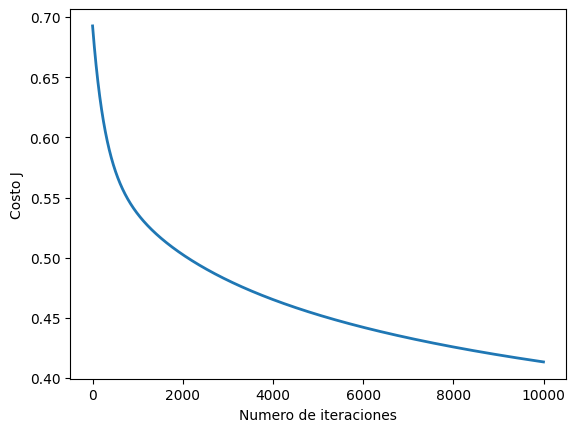

In [509]:
alpha = 0.003
num_iters = 10000
theta=np.zeros(16)
#print("valo xxxxx",X)
#print(type(X))
#print(X.shape)
#print(len(X))
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

#print("cosssss",np.arange(len(J_history)))
#término de sesgo 1
X_array = np.array([1, 0.5573770491803279, 0.5760000000000001, 0.0205416145425075, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0])
aprueba = sigmoid(np.dot(X_array, theta))
#
#edad_original = (edad_normalizada * (valor_max_edad - valor_min_edad)) + valor_min_edad


print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))
print(f"Un cliente con crédito : {(int(X_array[3]*(valor_max_cuenta - valor_min_cuenta)) + valor_min_cuenta)} y Edad: {int((X_array[1]*(valor_max_edad - valor_min_edad)) + valor_min_edad)}(descenso por el gradiente):{aprueba} ")
#print("jjjjjjj",J_history)

In [520]:
# Cargar tus datos normalizados
data_prueba = pd.read_csv('test.csv')

# X serán todas las columnas excepto "Is_Lead"
X_p = data_prueba.iloc[:, :15]
y_p = data_prueba.iloc[:, 15]
m_p = y_p.size

print(y_p)
X_p = np.concatenate([np.ones((m_p, 1)), X_p], axis=1)
#print([X_p])
# y será la columna "Is_Lead"
y_p_lista = y_p.tolist()
#print("valo xxxxx",X)
predicciones = []
#print(len(X))#X_p = X_p[:, :-1]  # Elimina la última columna de X_p
for i in range(0, 200):
    X_array = X_p[i].tolist()
    #X_array.insert(0, 1.0)  # Inserta el 1 al principio para el término de sesgo
    aprueba = sigmoid(np.dot(X_array, theta))
    predicciones.append(aprueba)
    print(f"Un cliente con crédito : {(int(X_array[3]*(valor_max_cuenta - valor_min_cuenta)) + valor_min_cuenta)} y Edad: {int((X_array[1]*(valor_max_edad - valor_min_edad)) + valor_min_edad)}(descenso por el gradiente):{aprueba} ")
    print(X_array)


0      1.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
195    0.0
196    1.0
197    1.0
198    1.0
199    0.0
Name: Is_Lead, Length: 200, dtype: float64
Un cliente con crédito : 1937545 y Edad: 43(descenso por el gradiente):0.2506706102642047 
[1.0, 0.3114754098360656, 0.8720000000000001, 0.0524923152894035, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
Un cliente con crédito : 2712091 y Edad: 29(descenso por el gradiente):0.05807347030278623 
[1.0, 0.0819672131147541, 0.192, 0.1759835969692011, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Un cliente con crédito : 2015758 y Edad: 30(descenso por el gradiente):0.06703939945202674 
[1.0, 0.0983606557377049, 0.136, 0.0649623443027565, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Un cliente con crédito : 2779356 y Edad: 46(descenso por el gradiente):0.06905105881869639 
[1.0, 0.3606557377049181, 0.192, 0.1867080576857534, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
Un c

In [521]:
for i in range(0, 200):
    print(f"Predicción: {predicciones[i]}, Valor real: {y_p_lista[i]}")


Predicción: 0.2506706102642047, Valor real: 1.0
Predicción: 0.05807347030278623, Valor real: 0.0
Predicción: 0.06703939945202674, Valor real: 0.0
Predicción: 0.06905105881869639, Valor real: 0.0
Predicción: 0.4399375512299285, Valor real: 0.0
Predicción: 0.986918851791987, Valor real: 1.0
Predicción: 0.04362225214164131, Valor real: 0.0
Predicción: 0.28210137838029237, Valor real: 1.0
Predicción: 0.23666240211679712, Valor real: 0.0
Predicción: 0.037059031930757796, Valor real: 0.0
Predicción: 0.04651980027789566, Valor real: 0.0
Predicción: 0.06531340894801889, Valor real: 0.0
Predicción: 0.4339579111678894, Valor real: 0.0
Predicción: 0.01849677781682157, Valor real: 0.0
Predicción: 0.3735767768692823, Valor real: 1.0
Predicción: 0.06051457968320202, Valor real: 0.0
Predicción: 0.06704395107429607, Valor real: 1.0
Predicción: 0.946435839983198, Valor real: 1.0
Predicción: 0.06367911493993268, Valor real: 0.0
Predicción: 0.057707773904085456, Valor real: 0.0
Predicción: 0.930028084882

In [512]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    grad = (1 / m) * (h - y).dot(X)

    return J, grad

In [513]:
# Inicializacion de parametros de ajuste
initial_theta = np.zeros(n+1)
print(initial_theta)
cost, grad = costFunction(initial_theta, X, y)

print('Costo en theta inicial (zeros): {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.693\n')
print(grad)
print('Gradiente en theta inicial (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[1, 0.5573770491803279, 0.5760000000000001, 0.0205416145425075, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0]\n')



[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Costo en theta inicial (zeros): 0.693
Costo esperado (aproximado): 0.693

[ 0.25625     0.0567418   0.04023     0.02958254  0.14        0.0725
 -0.003125    0.070625    0.100625    0.088125    0.178125    0.041875
  0.033125    0.003125    0.051875   -0.05      ]
Gradiente en theta inicial (zeros):
	[0.2562, 0.0567, 0.0402]
Gradiente esperado (aproximado):
	[1, 0.5573770491803279, 0.5760000000000001, 0.0205416145425075, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0]



In [514]:
# Calcula y muestra el costo y el gradiente con valores de theta diferentes a cero

test_theta = np.array([1, 0.5573770491803279, 0.5760000000000001, 0.0205416145425075, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0])

#test_theta = np.array([-11.74749157, 0.09927308, 0.09316497])
print(test_theta)
cost, grad = costFunction(test_theta, X, y)

print('Costo en theta prueba: {:.14f}'.format(cost))
print('Costo esperado (aproximado): 0.218\n')

print('Gradiente en theta prueba:')
print('\t[{:.14f}, {:.14f}, {:.14f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[1, 0.5573770491803279, 0.5760000000000001, 0.0205416145425075, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0]')


[1.         0.55737705 0.576      0.02054161 0.         1.
 0.         0.         0.         1.         0.         0.
 1.         0.         0.         1.        ]
Costo en theta prueba: 1.85631693076006
Costo esperado (aproximado): 0.218

Gradiente en theta prueba:
	[0.64391985321167, 0.19485092856728, 0.16767813549485]
Gradiente esperado (aproximado):
	[1, 0.5573770491803279, 0.5760000000000001, 0.0205416145425075, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0]


#### 1.2.3 Parámetros de aprendizaje usando `scipy.optimize`

In [515]:
# Establecer las opciones para optimize.minimize
options= {'maxiter': 1000}

# revisar la documentacion de scipy's optimize.minimize para mayor descripcion de los parametros
# La funcion devuekve un objeto `OptimizeResult`
# Se utiliza el algoritmo de Newton truncado para la optimización.
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# la propiedad fun del objeto devuelto por `OptimizeResult`
# contiene el valor del costFunction de un theta optimizado
cost = res.fun

# Theta optimizada esta en la propiedad x
theta = res.x

# Imprimir theta en la pantalla
print('Costo con un valor de theta encontrado por optimize.minimize: {:.14f}'.format(cost))
print('Costo esperado (aproximado): 0.203\n');

print('theta:')
print('\t[{:.14f}, {:.14f}, {:.14f}]'.format(*theta))
print('Theta esperado (aproximado):\n\t[1, 0.5573770491803279, 0.5760000000000001, 0.0205416145425075, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0]')

Costo con un valor de theta encontrado por optimize.minimize: 0.34023547930242
Costo esperado (aproximado): 0.203

theta:
	[-1.93999839666217, 0.27234908598710, 1.83227780047704]
Theta esperado (aproximado):
	[1, 0.5573770491803279, 0.5760000000000001, 0.0205416145425075, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0]


C:\Users\Usuario\AppData\Local\Temp\ipykernel_2964\3956479859.py:7: DeprecationWarning: 'maxiter' has been deprecated in favor of 'maxfun' and will be removed in SciPy 1.11.0.
  res = optimize.minimize(costFunction,


In [516]:
# verificar si ingresa o no a la universidad
X_array = [1, 0.5573770491803279, 0.5760000000000001, 0.0205416145425075, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0]
theta_om = [0.25625, 0.0567418, 0.04023, 0.02958254, 0.14, 0.0725, -0.003125, 0.070625, 0.100625, 0.088125, 0.178125, 0.041875, 0.033125, 0.003125, 0.051875, -0.05]
aprueba = sigmoid(np.dot(X_array, theta_om))   # Se debe cambiar esto
print(f"Un cliente con crédito : {(int(X_array[3]*(valor_max_cuenta - valor_min_cuenta)) + valor_min_cuenta)} y Edad: {int((X_array[1]*(valor_max_edad - valor_min_edad)) + valor_min_edad)}(descenso por el gradiente):{aprueba} ")



Un cliente con crédito : 1737148 y Edad: 58(descenso por el gradiente):0.611923960845278 


<a id="section4"></a>
#### 1.2.4 Evaluación de la regresión logistica

In [517]:
def predict(theta, X):
   
    m = X.shape[0] # Numero de ejemplo de entrenamiento

    p = np.zeros(m)

    p = np.round(sigmoid(X.dot(theta.T)))
    return p

In [518]:

prob = sigmoid(np.dot([1, 0.5573770491803279, 0.5760000000000001, 0.0205416145425075, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0], theta))


print('Un cliente con crédito 5779174.9 y edad 59, se predice una probabilidad de retirada del banco de: {:.3f}%'.format(prob))
print('Valor esperado: 0.775 +/- 0.002\n')

# Compute accuracy on our training set
p = predict(theta, X)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y) * 100))
print('Precisión esperada (aproximadamente): 89.00 %')


Un cliente con crédito 5779174.9 y edad 59, se predice una probabilidad de retirada del banco de: 0.974%
Valor esperado: 0.775 +/- 0.002

Precisión de entrenamiento: 85.50 %
Precisión esperada (aproximadamente): 89.00 %
